<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 177.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 181.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 168.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 162.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 157.6 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [6]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
## Write your code here
critical_cols = ['Employment', 'JobSat', 'RemoteWork']
missing_summary = df[critical_cols].isnull().sum()
print("Missing values in critical columns:\n", missing_summary)

for col in critical_cols:
    missing_count = df[col].isnull().sum()
    total = df.shape[0]
    missing_rate = missing_count / total

    if missing_rate < 0.05:  # Less than 5% missing
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Imputed '{col}' with most frequent value: {mode_val}")
    else:
        df = df[df[col].notnull()]
        print(f"Dropped rows with missing values in '{col}' (more than 5% missing)")


Missing values in critical columns:
 Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64
Imputed 'Employment' with most frequent value: Employed, full-time
Dropped rows with missing values in 'JobSat' (more than 5% missing)
Imputed 'RemoteWork' with most frequent value: Hybrid (some remote, some in-person)


/tmp/ipykernel_500/962831268.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)
/tmp/ipykernel_500/962831268.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mode_val, inplace=True)


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_301/3273088544.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
/tmp/ipykernel_301/3273088544.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='ExperienceRange', y='JobSat', palette='mako')


  ExperienceRange  JobSat
0         0–5 yrs     7.0
1        5–10 yrs     7.0
2       10–20 yrs     8.0
3         20+ yrs     8.0


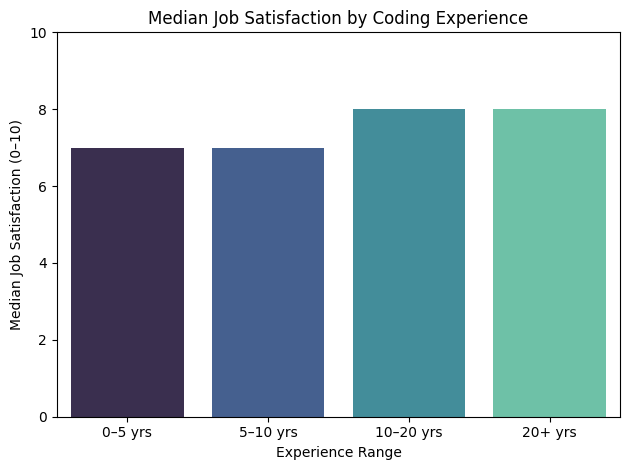

In [7]:
## Write your code here
##Clean YearsCodePro
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

bins = [0, 5, 10, 20, float('inf')]
labels = ['0–5 yrs', '5–10 yrs', '10–20 yrs', '20+ yrs']

df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels)

##Create Experience Ranges
bins = [0, 5, 10, 20, float('inf')]
labels = ['0–5 yrs', '5–10 yrs', '10–20 yrs', '20+ yrs']

df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels)

#Compute Median JobSat by Experience Range
grouped = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
print(grouped)

#Plot the Results
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=grouped, x='ExperienceRange', y='JobSat', palette='mako')
plt.title('Median Job Satisfaction by Coding Experience')
plt.xlabel('Experience Range')
plt.ylabel('Median Job Satisfaction (0–10)')
plt.ylim(0, 10)
plt.tight_layout()
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_301/3650898164.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', palette='viridis')


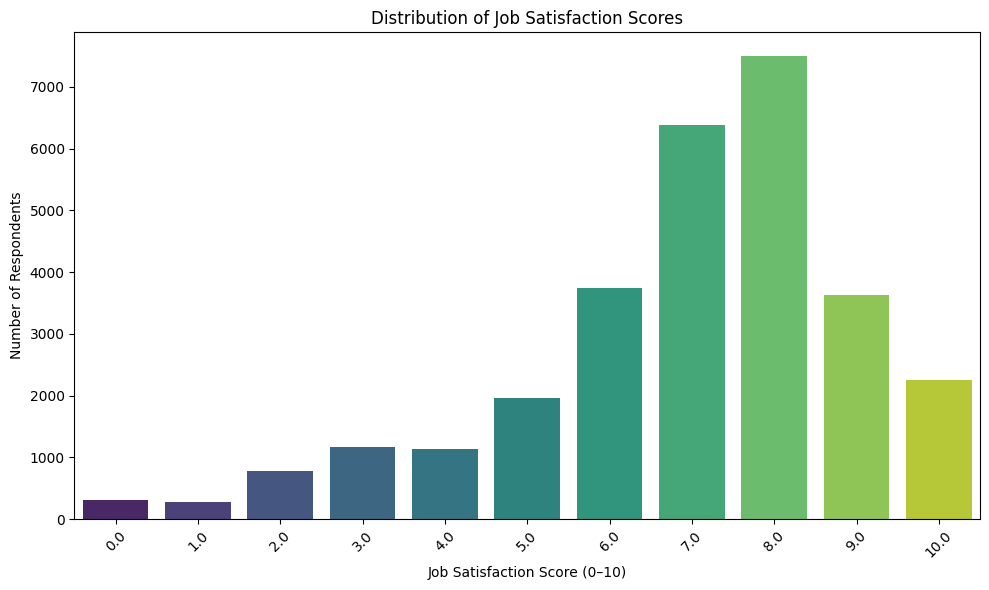

In [8]:
## Write your code here
# Count plot of Job Satisfaction values
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobSat', palette='viridis')

plt.title('Distribution of Job Satisfaction Scores')
plt.xlabel('Job Satisfaction Score (0–10)')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_301/2095879840.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', palette='Set2')


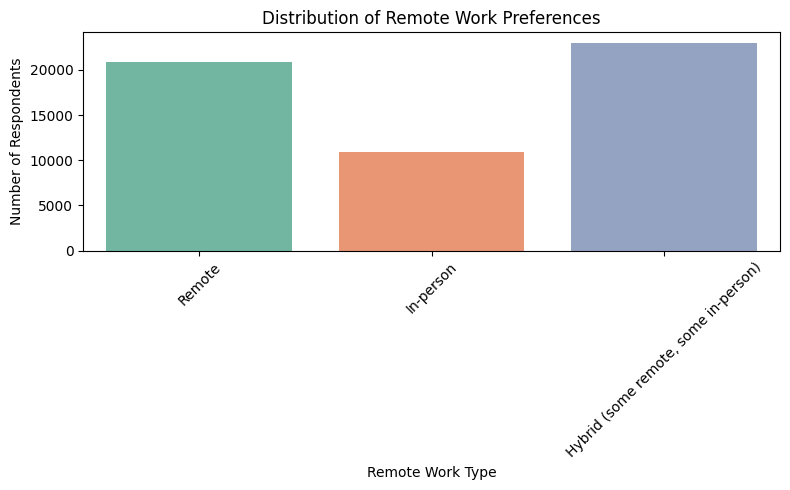

In [9]:
## Write your code here
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RemoteWork', palette='Set2')

plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Type')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


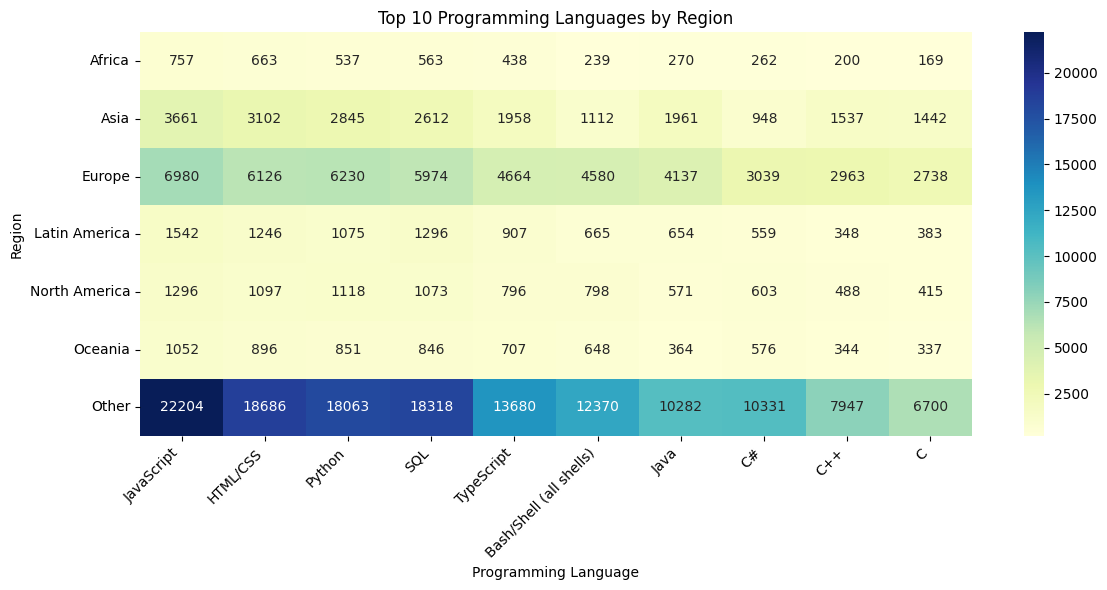

In [13]:
## Write your code here

# Define a function to map countries to regions
def map_region(country):
    if country in ['United States', 'Canada']:
        return 'North America'
    elif country in ['Germany', 'United Kingdom', 'France', 'Netherlands', 'Spain', 'Italy', 'Sweden']:
        return 'Europe'
    elif country in ['India', 'China', 'Japan', 'Pakistan', 'Bangladesh']:
        return 'Asia'
    elif country in ['Brazil', 'Argentina', 'Mexico', 'Chile']:
        return 'Latin America'
    elif country in ['Australia', 'New Zealand']:
        return 'Oceania'
    elif country in ['South Africa', 'Nigeria', 'Kenya', 'Egypt']:
        return 'Africa'
    else:
        return 'Other'

# Map countries to regions
df['Region'] = df['Country'].apply(map_region)

# Explode the LanguageHaveWorkedWith column into individual languages
df_exploded = df.dropna(subset=['LanguageHaveWorkedWith', 'Region']).copy()
df_exploded['Language'] = df_exploded['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_exploded.explode('Language')

# Group by Region and Language, count occurrences
lang_region_counts = df_exploded.groupby(['Region', 'Language']).size().unstack(fill_value=0)

# Select top 10 most popular languages overall for clarity
top_languages = lang_region_counts.sum().sort_values(ascending=False).head(10).index
filtered_counts = lang_region_counts[top_languages]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Top 10 Programming Languages by Region')
plt.xlabel('Programming Language')
plt.ylabel('Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


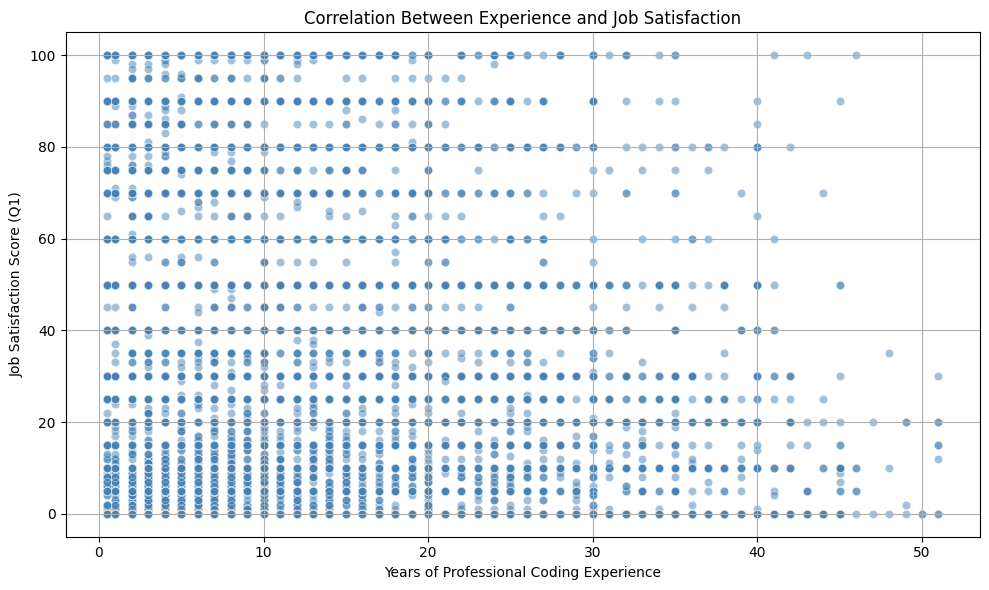

In [11]:
## Write your code here
#Clean YearCodePro
def convert_experience(value):
    if value == "Less than 1 year":
        return 0.5
    elif value == "More than 50 years":
        return 51
    try:
        return float(value)
    except:
        return None

df['YearsCodePro_cleaned'] = df['YearsCodePro'].apply(convert_experience)

#Drop Missing Values
scatter_df = df[['YearsCodePro_cleaned', 'JobSatPoints_1']].dropna()

#Plot Scatter Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=scatter_df,
    x='YearsCodePro_cleaned',
    y='JobSatPoints_1',
    alpha=0.5,
    color='steelblue'
)

plt.title('Correlation Between Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score (Q1)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


/tmp/ipykernel_301/750920877.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


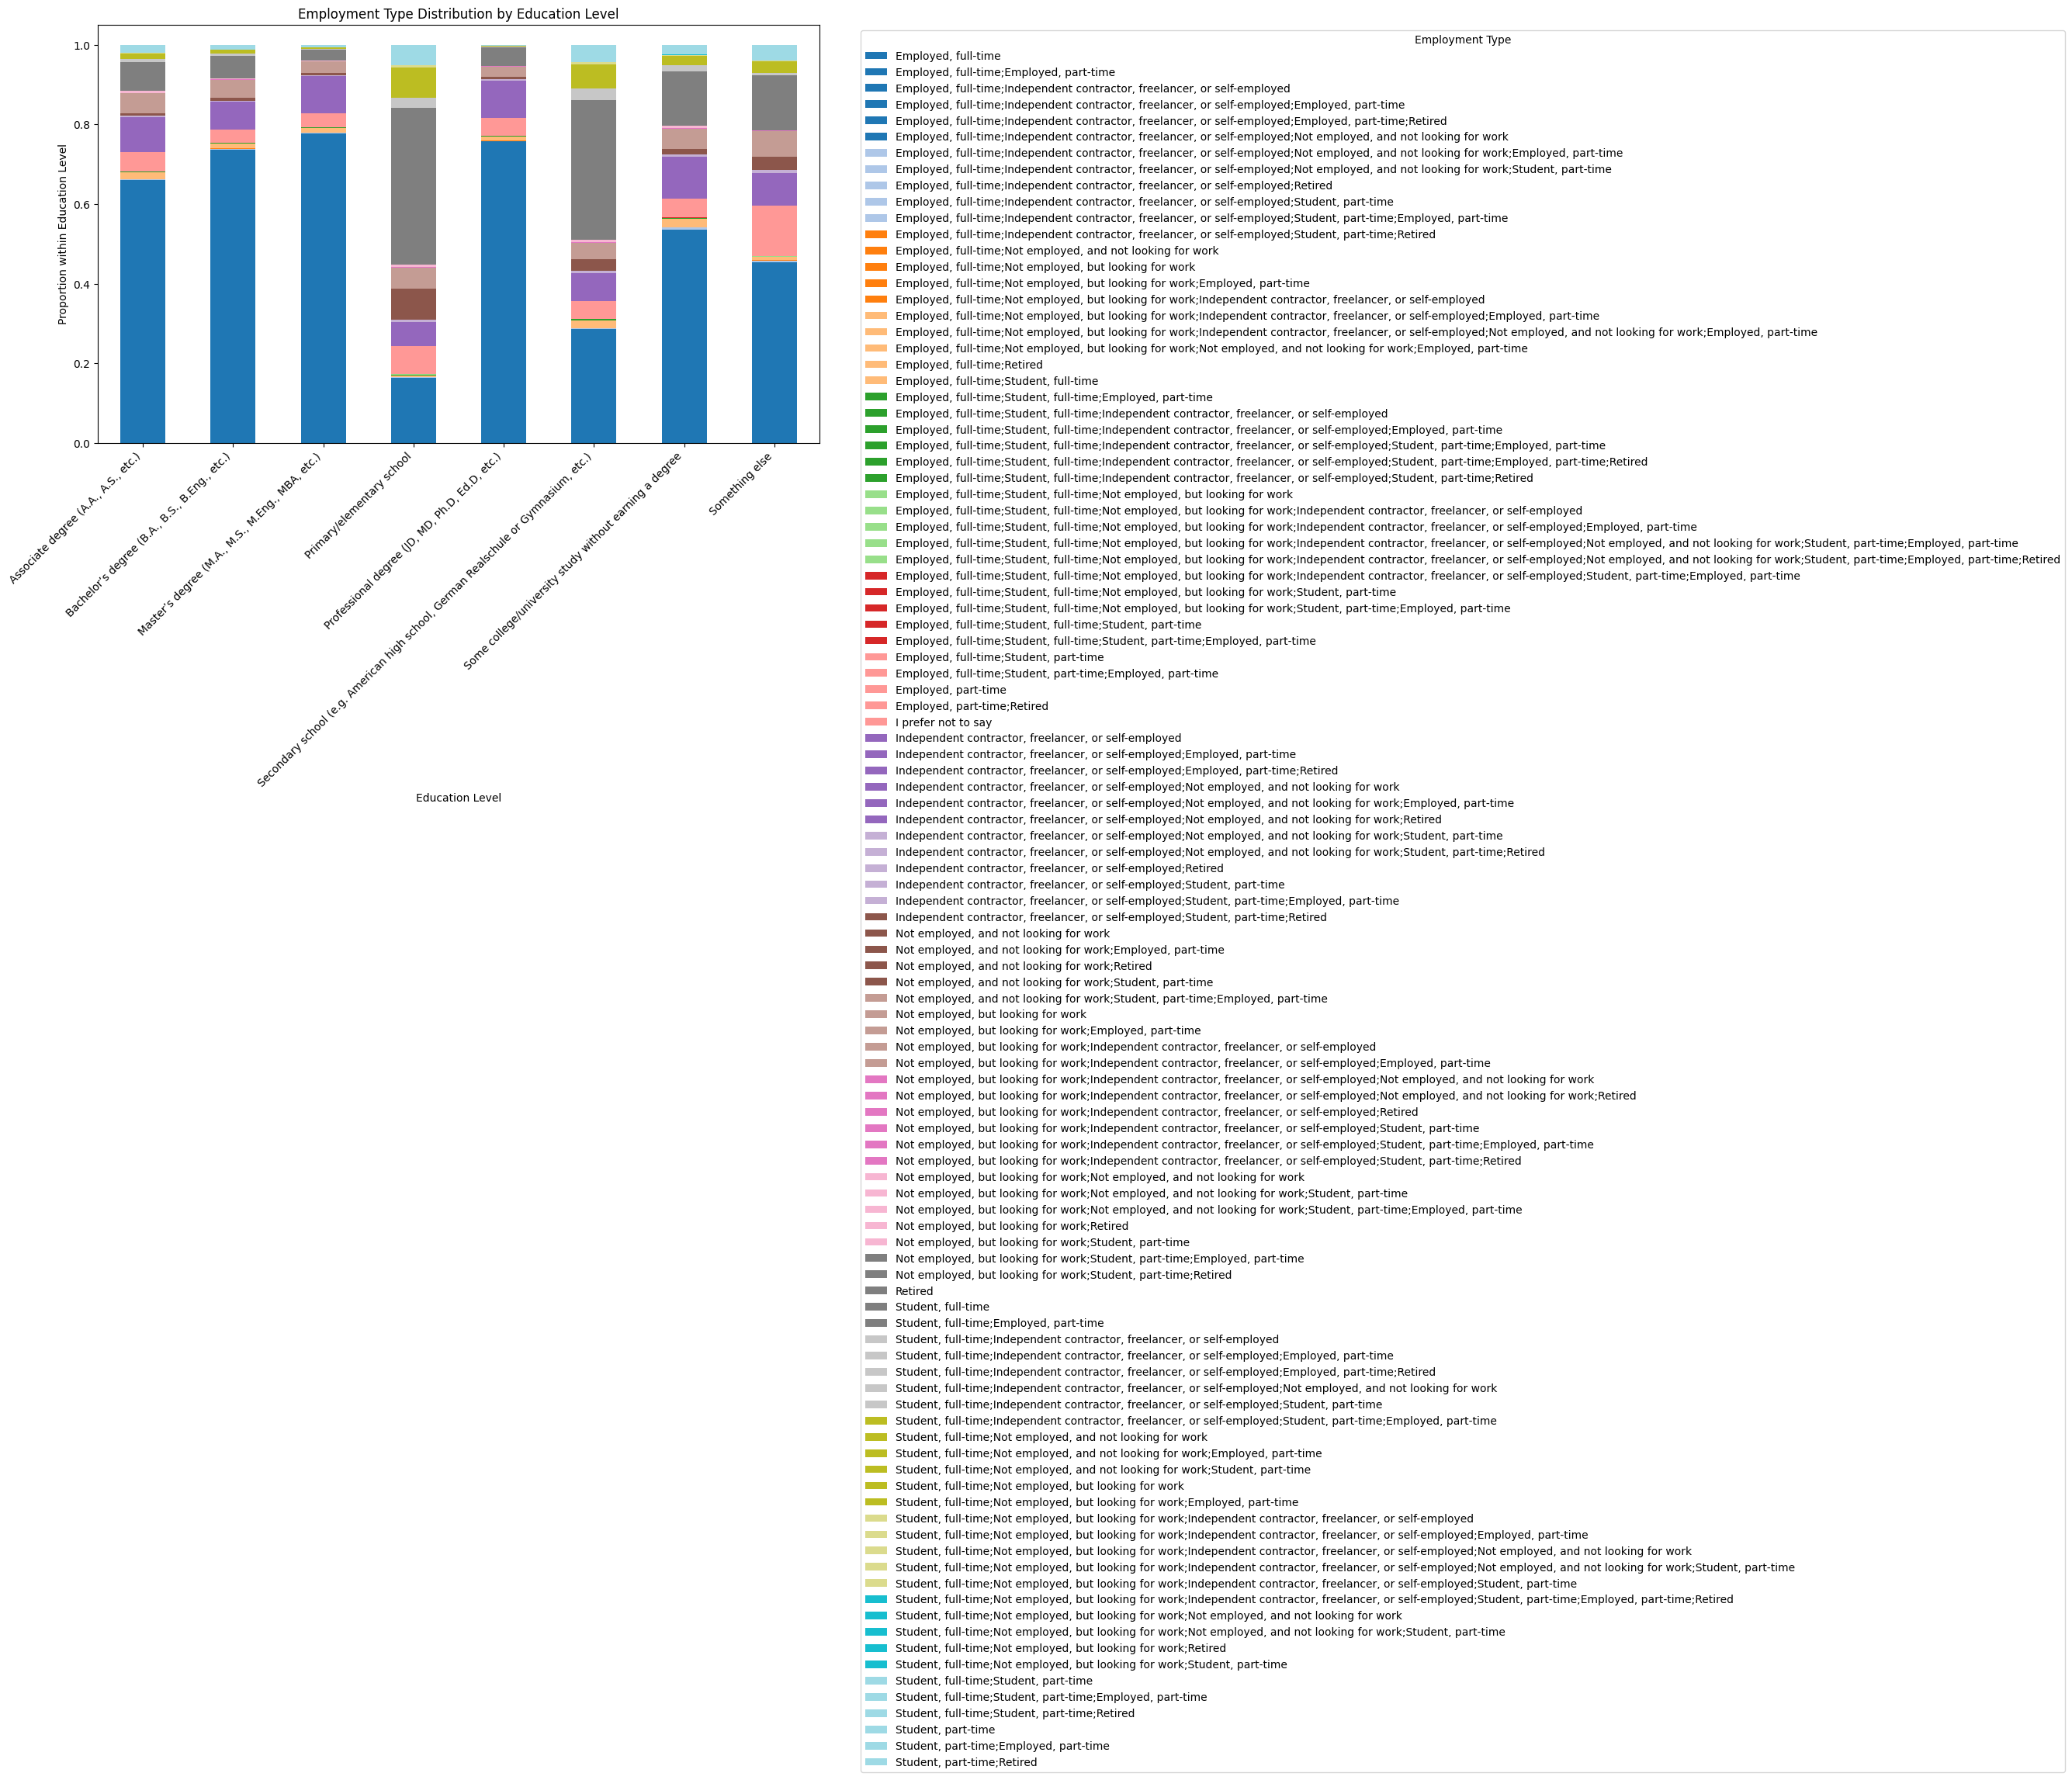

In [14]:
## Write your code here

# Cross-tabulation of EdLevel and Employment (proportion within each education level)
education_employment_ct = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index')

# Stacked bar plot showing proportion of employment types within each education level
education_employment_ct.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')
plt.title('Employment Type Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion within Education Level')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [15]:
## Write your code here
# Save the DataFrame to a CSV file
df.to_csv('modified_survey_data.csv', index=False)


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
